In [1]:
import torch
import torch.nn as nn

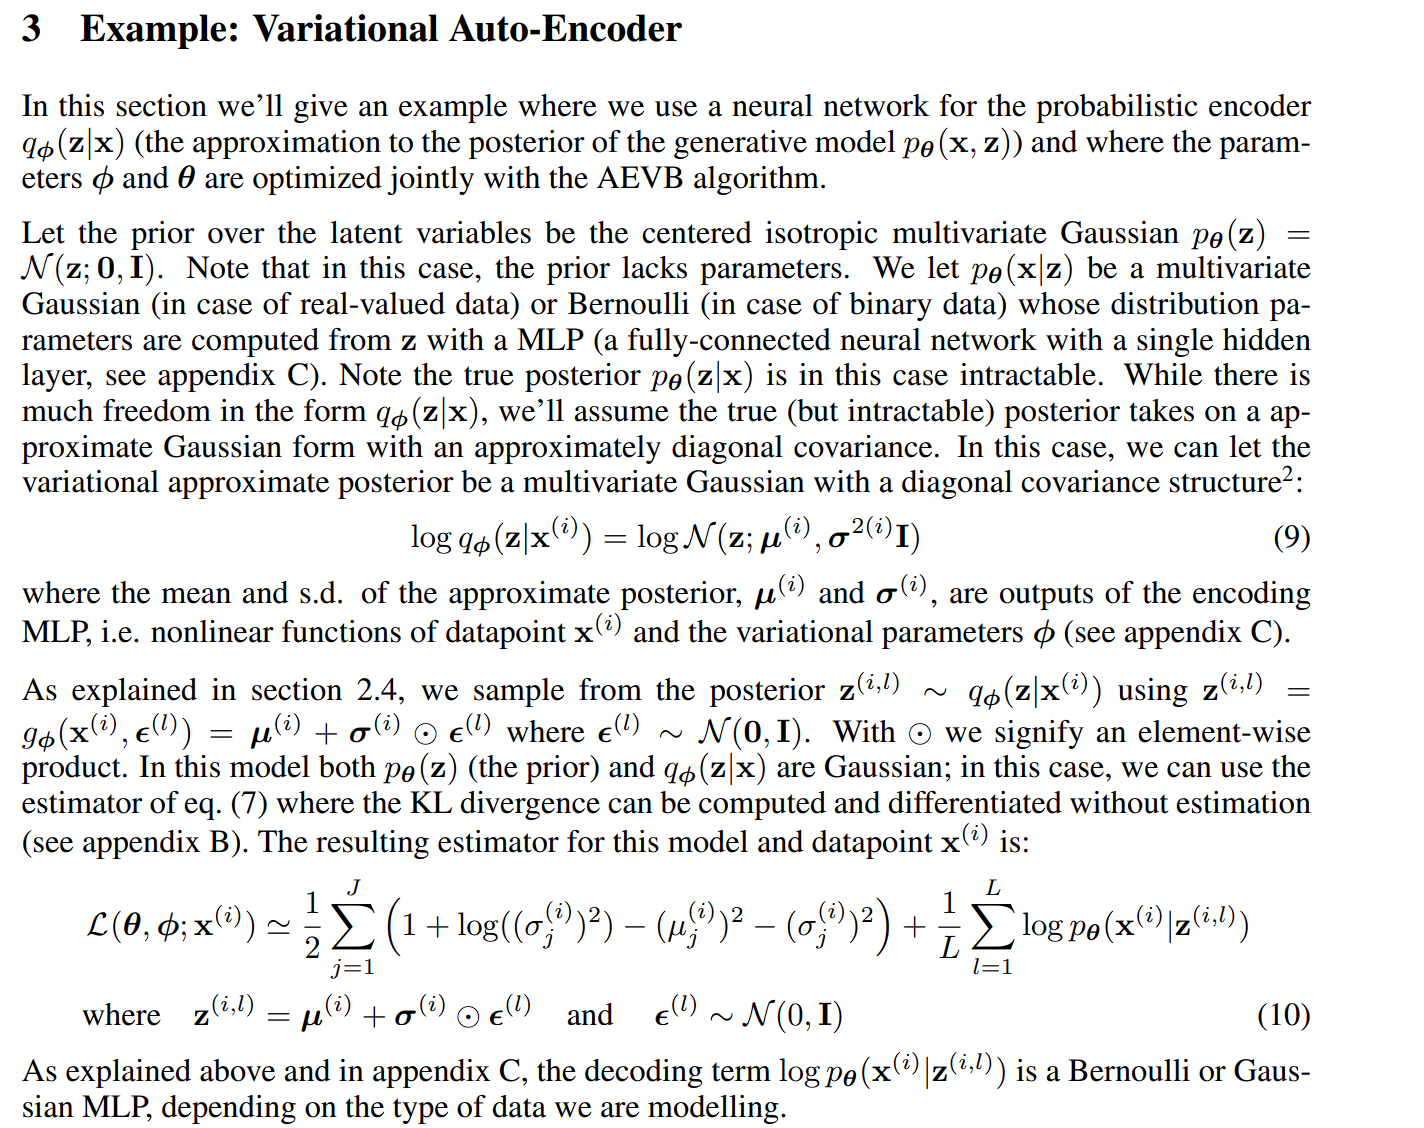

In [ ]:
class LinearLayer(nn.Module):
    def __init__(self, in_features: int, out_features: int):
        super().__init__()

        self.weight = nn.Parameter(torch.rand(in_features, out_features))
        self.bias = nn.Parameter(torch.rand(out_features))
    
    def forward(self, x: torch.tensor):
        return x @ self.weight + self.bias

# class LayerNorm(nn.Module):
#     def __init__(self, in_features: int, eps: float = 0.001):
#         super().__init__()

#         self.gamma = nn.Parameter(torch.ones(in_features))
#         self.beta = nn.Parameter(torch.zeros(in_features))
#         self.eps = eps
    
#     def forward(self, x: torch.tensor):

#         x_mean = x.mean(dim = -1, keepdim = True)
#         x_var = x.var(dim = -1, keepdim = True, unbiased = False)
#         x_norm = x - x_mean / torch.sqrt(x_var + self.eps)

#         return x_norm * self.gamma + self.beta
    
class Encoder(nn.Module):
    def __init__(self, x_dim: int, hidden_dim: int, latent_dim: int):
        super().__init__()
        self.linear_1 = LinearLayer(x_dim, hidden_dim)
        self.linear_2 = LinearLayer(hidden_dim, latent_dim)
        self.linear_3 = LinearLayer(hidden_dim, latent_dim)

    def forward(self, x: torch.tensor):
        h = torch.relu(self.linear_1(x))
        mean = self.linear_2(h)
        log_var = self.linear_3(h)

        return mean, log_var
    
    def reparameterize(self, mean: torch.tensor, log_var: torch.tensor):
        noise = torch.randn_like(log_var)
        std = torch.exp(log_var * 0.5)
        return mean + std * noise

class Decoder(nn.Module):
    def __init__(self, x_dim: int, hidden_dim: int, latent_dim: int):
        super().__init__()
        self.linear_1 = LinearLayer(latent_dim, hidden_dim)
        self.linear_2 = LinearLayer(hidden_dim, x_dim)

    def forward(self, x: torch.tensor):
        return torch.sigmoid(self.linear_2(self.linear_1(x)))


class VariationalAutoEncoder(nn.Module):
    def __init__(self, x_dim: int, hidden_dim: int, latent_dim: int):
        super().__init__()
        self.encoder = Encoder(x_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(x_dim, hidden_dim, latent_dim)

    def forward(self, x: torch.tensor):
        mean, log_var = self.encoder(x)
        z = self.encoder.reparameterize(mean, log_var)
        generated_x = self.decoder(z)
        return generated_x, mean, log_var


In [3]:
# B, N, F = x.shape
x = torch.rand(2, 5, 2)

In [18]:
x.mean(dim=1, keepdim=True).shape

torch.Size([2, 1, 2])

In [11]:
x[0].mean(dim=1)

tensor([0.7501, 0.5790, 0.4963, 0.4684, 0.6801])

In [14]:
x[0].mean(0)

tensor([0.6196, 0.5700])

In [31]:
encoder = Encoder(10, 8, 5)

In [34]:
encoder(torch.rand(5,5,10))[0]

tensor([[[12.1295, 11.8524, 12.6908, 14.3330, 12.9871],
         [14.9004, 14.7141, 14.8565, 17.8116, 15.9207],
         [14.7581, 14.4142, 15.1929, 17.2131, 15.6485],
         [12.0592, 11.7020, 12.0485, 14.1298, 12.6047],
         [12.0454, 11.8628, 12.1201, 14.2536, 12.9071]],

        [[10.6934, 10.4728, 11.3213, 12.8088, 11.6696],
         [12.1848, 12.0739, 12.0951, 14.7022, 12.9446],
         [15.7183, 15.1104, 16.0426, 18.0343, 16.5081],
         [ 9.5789,  9.3513, 10.1207, 11.3424, 10.2929],
         [15.2382, 14.9741, 15.3638, 17.9722, 16.2075]],

        [[10.4514, 10.5721, 10.4847, 12.7678, 11.2320],
         [12.8414, 12.7292, 12.8889, 15.3074, 13.5529],
         [ 9.8440,  9.8687, 10.0583, 12.1653, 10.8244],
         [13.0865, 12.7996, 13.2299, 15.3489, 13.8898],
         [11.3368, 11.0255, 11.8837, 13.2322, 12.0412]],

        [[10.8035, 10.6077, 10.5078, 12.8225, 11.2828],
         [10.8282, 10.6287, 10.9213, 12.8579, 11.4520],
         [10.0771, 10.1251, 10.0165, 12.31